# Imports et téléchargement du fichier CIF

In [1]:
#import

from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from matplotlib import pyplot as plt
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter as Bsp
from scipy import constants as scc
import numpy as np
import matplotlib.image as img

#telechargement du fichier cif de mp-1367
with MPRester("hJ9SDZIQUxgk5cVi") as m:

    # Structure of the bands for material id
    strucBand = m.get_bandstructure_by_material_id("mp-1367")

# Bandes électroniques du cristal

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

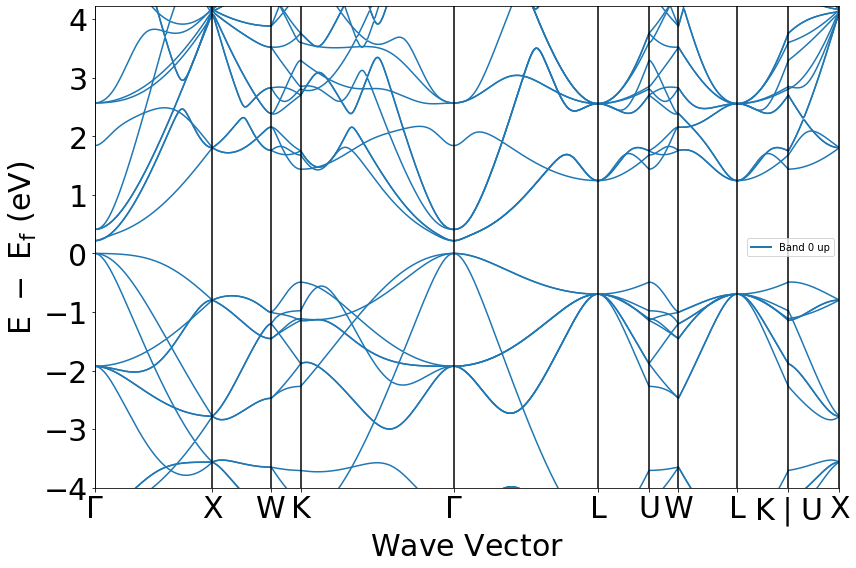

In [2]:
#Téléchargement de la structure de bande
bs = Bsp(strucBand)
#Graphe des bandes électroniques du cristal
bs.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=False, smooth_tol=None)


# Détermination de la bande interdite

In [3]:
e_fermi = strucBand.efermi
print("L'énergie de Fermi est de :", e_fermi, "eV")
gap = strucBand.get_band_gap()
print("Information sur la bande interdite :", gap)
print("La bande est-elle métallique ?", bs.bs_plot_data().get("is_metal"))
print("")
print("La bande interdite est directe et se situe entre", 0+e_fermi, "eV et", gap.get('energy')+e_fermi, "eV. Son énergie est donc de", gap.get('energy'),".\n", "De ces données, on peut conclure que nous sommes en présence d'un matériau :")
print("- semi-conducteur (énergie de bande inférieure à 1 eV, ici 0.2169 eV)")
print("- non métallique (énergie de Fermi inférieure à l'énergie de Fermi d'un métal comprise entre 5 et 10 eV, ici 0.2169)")

L'énergie de Fermi est de : 3.3403751 eV
Information sur la bande interdite : {'direct': True, 'energy': 0.21690000000000031, 'transition': '\\Gamma-\\Gamma'}
La bande est-elle métallique ? False

La bande interdite est directe et se situe entre 3.3403751 eV et 3.5572751000000005 eV. Son énergie est donc de 0.21690000000000031 .
 De ces données, on peut conclure que nous sommes en présence d'un matériau :
- semi-conducteur (énergie de bande inférieure à 1 eV, ici 0.2169 eV)
- non métallique (énergie de Fermi inférieure à l'énergie de Fermi d'un métal comprise entre 5 et 10 eV, ici 0.2169)


La bande interdite est représentée en jaune. Les points rouges indiquent les minima de la bande de condution et les points verts les maxima de la bande de valence.
On voit bien que le gap est direct vu que les minima et les maxima sont alignés


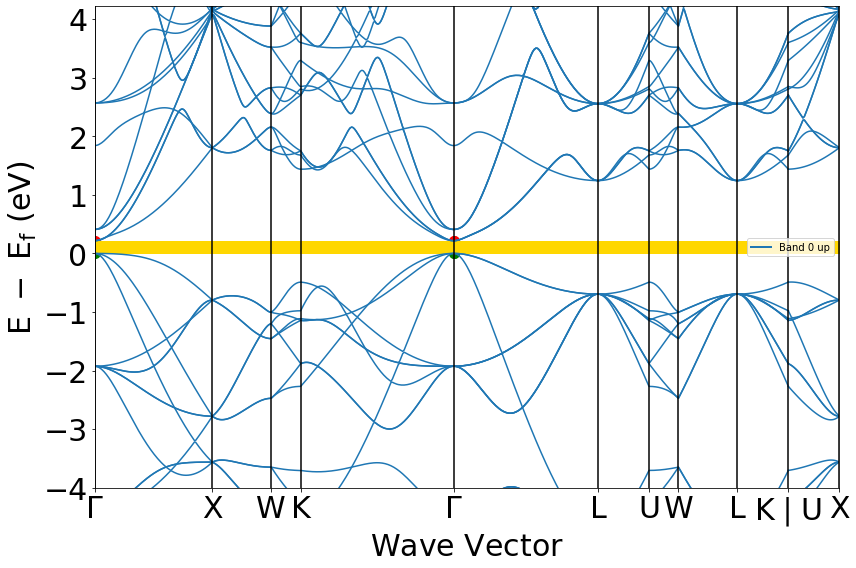

In [4]:
print('La bande interdite est représentée en jaune. Les points rouges indiquent les minima de la bande de condution et les points verts les maxima de la bande de valence.')
print('On voit bien que le gap est direct vu que les minima et les maxima sont alignés')
data = bs.bs_plot_data()
#vbm_cbm_marker=True marque les minima et les maxima
bs.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
#représentation de la bande interdite en jaune
ticks = data.get("ticks")
plt.fill_between(np.linspace(0, ticks.get("distance")[-1], 500), 0, gap.get('energy'), color ='gold')
plt.show()


# Dernière bande de valence

In [5]:
# Determine le E0
E_0 = data.get('zero_energy')

vbmData = strucBand.get_vbm()
E_vbm = vbmData['energy']
kpoint_vbm = vbmData['kpoint'].cart_coords

print('Energie du maximum de la bande de valence = ',E_vbm,'eV')
print('sur le graphe : E-Ef = ', (E_vbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =', kpoint_vbm)
print(str(vbmData.get('band_index')))
print('La dernière bande de valence est la 39 ')

Energie du maximum de la bande de valence =  3.3356 eV
sur le graphe : E-Ef =  0.0
Vecteur k (coordonnées cartésiennes) = [0. 0. 0.]
defaultdict(<class 'list'>, {<Spin.up: 1>: [37, 38, 39]})
La dernière bande de valence est la 39 


# Première bande de conduction

In [6]:
cbmData = strucBand.get_cbm()
E_cbm = cbmData['energy']
kpoint_cbm = cbmData['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print(cbmData.get('band_index'))
print('La première bande de conduction est la 40')

Energie du minimum de la bande de conduction =  3.5525 eV
sur le graphe : E-Ef =  0.21690000000000031
Vecteur k (coordonnées cartésiennes) = [0. 0. 0.]
defaultdict(<class 'list'>, {<Spin.up: 1>: [40, 41, 42]})
La première bande de conduction est la 40


# Recherche des dispersions maximales et minimales

In [7]:
#calcul de la pente sur l'intervalle (x,y)
def pente(x,y):
	return np.array([abs((y[-1]-y[0])/(x[-1]-x[0])),x[0],y[0],x[-1]-x[0],y[-1]-y[0]])

#calcul de la dispersions maximale et minimale de la bande y
dist = data.get('distances')
energy = data.get('energy')
def computeDispersions(y):
    slopes = np.zeros((len(dist),5))
    for i in range(len(slopes)):
        slopes[i] = pente(dist[i],energy.get('1')[i][y])
    s = (slopes.T)
    return (s,np.argmax(s[0]),np.argmin(s[0]))

(cbs,maxCb,minCb) = computeDispersions(40)
(vbs,maxVb,minVb) = computeDispersions(39)

La plus grande dispersion sur la dernière bande de valence est en orange et celle sur la première bande de conduction est en bleu
La plus petite dispersion sur la dernière bande de valence est en mauve et celle sur la première bande de conduction est en jaune


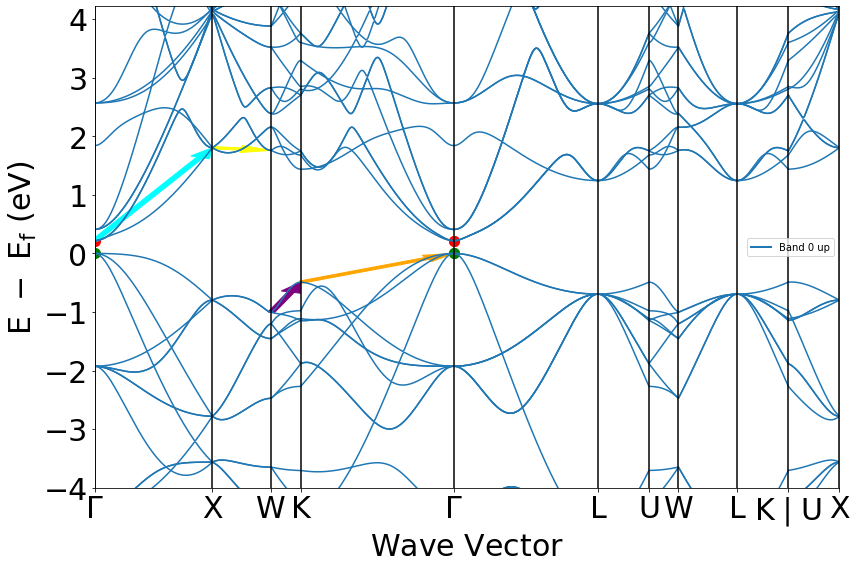

In [8]:
bs.get_plot(zero_to_efermi=True, ylim=None, smooth=False, vbm_cbm_marker=True, smooth_tol=None)
plt.arrow(vbs[1,minVb],vbs[2,minVb],vbs[3,minVb],vbs[4,minVb],color='orange',width=0.04,length_includes_head=True)
plt.arrow(cbs[1,maxCb],cbs[2,maxCb],cbs[3,maxCb],cbs[4,maxCb],color='cyan',width=0.04,length_includes_head=True)
plt.arrow(vbs[1,maxVb],vbs[2,maxVb],vbs[3,maxVb],vbs[4,maxVb],color='purple',width=0.04,length_includes_head=True)
plt.arrow(cbs[1,minCb],cbs[2,minCb],cbs[3,minCb],cbs[4,minCb],color='yellow',width=0.04,length_includes_head=True)

print("La plus grande dispersion sur la dernière bande de valence est en orange et celle sur la première bande de conduction est en bleu")
print("La plus petite dispersion sur la dernière bande de valence est en mauve et celle sur la première bande de conduction est en jaune")


# Calcul de la masse effective

Afin de calculer la masse effective au sommet de la dernière bande de valence et à la base de la permière bande de conduction. On approxime ces 2 bandes par une parabole ax^2+bx+c.
Ensuite, on calcule la masse effective avec la formule vue au cours :


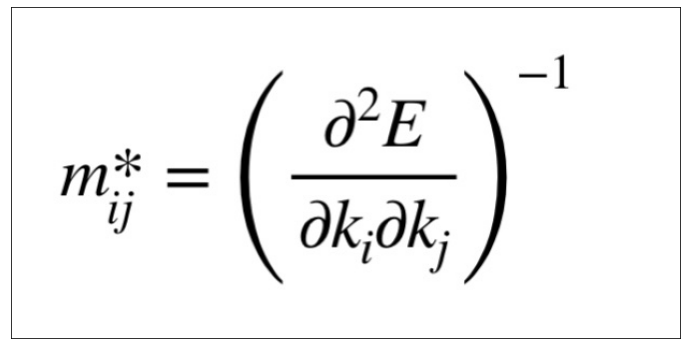

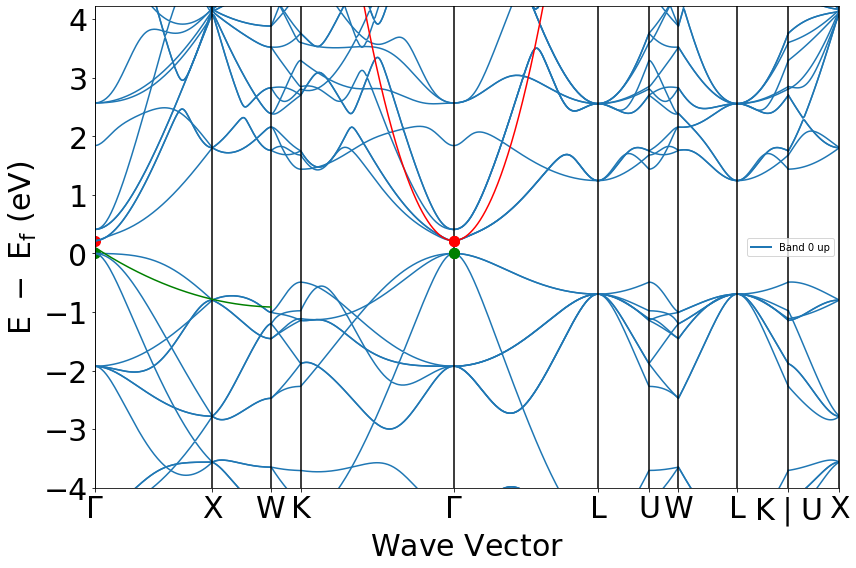

La parabole rouge interpole la première bande de conduction et son équation est : 
14.230393307694689k² + -60.56891261160802k + 64.66685484109905


La parabole verte interpole la dernière bande de valence et son équation est : 
0.8558433141284484k² + -1.8719351499178636k + 0.10645404078779111


In [9]:
#image formule
image_1=img.imread('thumbnail_image0.jpg')
fig, axes = plt.subplots(figsize=(12,12))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
axes.imshow(image_1)
plt.show()

hbar = 6.582119570 * 1e-16 #eVs, la constante de planck réduite

Vbm = data.get("vbm")
Cbm = data.get("cbm")
  
bs.get_plot(vbm_cbm_marker=True)

#On met en évidence le maximum de la bande de valence
(x,y) = Vbm[1]
plt.plot(x,y,'og',markersize=10)

#On met en évidence le minimum de la bande de valence
(x, y) = Cbm[1]
plt.plot(x,y,'or',markersize=10)

K = np.zeros(3)
E = np.zeros(3)

#On remplit les vecteurs d'ondes et les énergies avec au sommet le vbm et les valeurs voisines de ce maximum

K[0], E[0] = dist[0][-2], energy['1'][0][39][-2]
K[1], E[1] = Vbm[1]
K[2], E[2] = dist[1][1], energy['1'][1][39][1]

#Régression quadratique
f_vbm = np.polyfit(K, E, 2) 
x = np.linspace(dist[0][0],dist[1][-1],1000)
plt.plot(x,np.polyval(f_vbm,x),'g')

#On remplit les vecteurs d'ondes et les énergies avec au sommet le cbm et les valeurs voisines de ce minimum

K[0], E[0] = dist[3][-2], energy['1'][3][40][-2] 
K[1], E[1] = Cbm[1] 
K[2], E[2] = dist[4][2], energy['1'][4][40][2]

#Régression quadratique
f_cbm = np.polyfit(K, E, 2)
x = np.linspace(dist[3][10],dist[4][-9],1000)
plt.plot(x,np.polyval(f_cbm,x),'r')

plt.show()

print("La parabole rouge interpole la première bande de conduction et son équation est : \n"+str(f_cbm[0])+"k² + "+str(f_cbm[1])+"k + "+str(f_cbm[2]))
print("\n")

print("La parabole verte interpole la dernière bande de valence et son équation est : \n"+str(f_vbm[0])+"k² + "+str(f_vbm[1])+"k + "+str(f_vbm[2]))


In [10]:
deriveeVbm = 2*f_vbm[0]
deriveeCbm = 2*f_cbm[0]

masseVbm = (hbar**2)/deriveeVbm
masseCbm = (hbar**2)/deriveeCbm

print("La masse effective à la première bande de conduction est : " + str(masseCbm) + " kg")
print("La masse effective à la dernière bande de valence est : " + str(masseVbm) + " kg")

La masse effective à la première bande de conduction est : 1.5222452780117672e-32 kg
La masse effective à la dernière bande de valence est : 2.5310881862701973e-31 kg
